# Backpropagation task

In [54]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

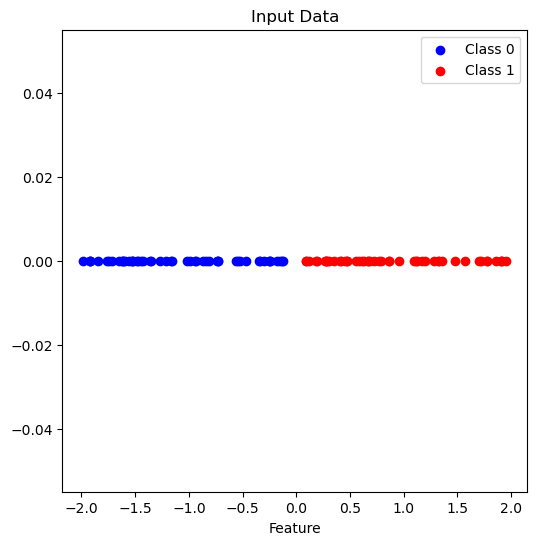

In [55]:
# Generate synthetic data for classification
np.random.seed(0)
X = np.random.uniform(-2, 2, size=(100, 1))  # 100 samples, 1 feature
y = (X >= 0).astype(int)  # Binary classification: 1 if X >= 0, else 0

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(X[y==0], np.zeros_like(X[y==0]), color='blue', label='Class 0')
plt.scatter(X[y==1], np.zeros_like(X[y==1]), color='red', label='Class 1')
plt.title('Input Data')
plt.xlabel('Feature')
plt.legend()
plt.show()

First, initialise the parameters. This means determining the following:

**Size of the network**

Hidden layers (or a single hidden layer in this example) can be any size. Layers with more neurons are more powerful, but also more likely to overfit, and take longer to train. The output layer size corresponds to the number of classes.

**Number of iterations**

This parameter determines how many times the network will be updated.

**Learning rate**

Each time we update the weights, we do so by taking a step into the direction that we calculated will improve the accuracy of the network. The size of that step is determined by the learning rate. Taking small steps will slow the process down, but taking steps that are too large can cause results to vary wildly and not reach a stable optimum.

In [ ]:
# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)


# Initialize parameters
input_size = 1
hidden_size = 4
output_size = 1

# Weights initialization
np.random.seed(1)
W1 = np.random.randn(input_size, hidden_size)
W2 = np.random.randn(hidden_size, output_size)

# Training parameters
num_iter = 2000        # try different values like 500, 2000
learning_rate = 0.1    # try 0.01, 0.05, 0.2, etc.
hidden_size = 4        # try 2, 6, 8 for experimentation


Next, fill in the code below to train a multi-layer perceptron and see if it correctly classifies the input.

Activation: sigmoid, Iteration 0, Loss: 0.6926
Activation: sigmoid, Iteration 500, Loss: 0.1568
Activation: sigmoid, Iteration 1000, Loss: 0.0694
Activation: sigmoid, Iteration 1500, Loss: 0.0458
Activation: relu, Iteration 0, Loss: 0.6885
Activation: relu, Iteration 500, Loss: 0.0642
Activation: relu, Iteration 1000, Loss: 0.0341
Activation: relu, Iteration 1500, Loss: 0.0233

--- Hidden Layer & Activation Impact ---
Activation: sigmoid, Hidden Size: 2, Final Loss: 0.2596
Activation: sigmoid, Hidden Size: 4, Final Loss: 0.2118
Activation: sigmoid, Hidden Size: 6, Final Loss: 0.1535
Activation: relu, Hidden Size: 2, Final Loss: 0.0651
Activation: relu, Hidden Size: 4, Final Loss: 0.0645
Activation: relu, Hidden Size: 6, Final Loss: 0.0621


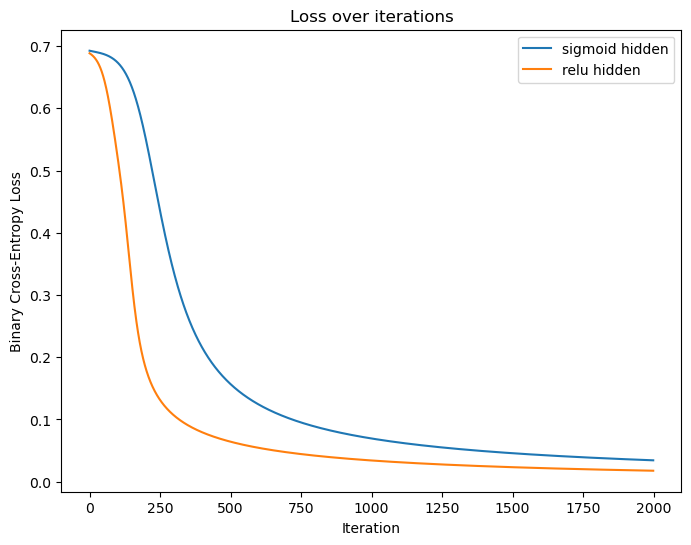

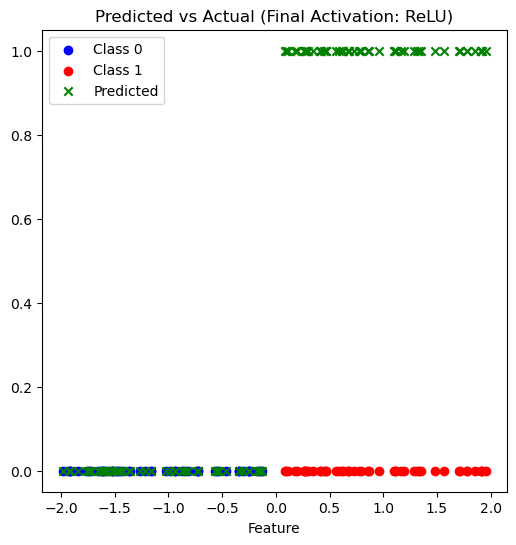

In [57]:
activation_list = ['sigmoid', 'relu']
loss_history = {}

# Main experiment: compare activations
for activation in activation_list:
    # Re-initialize weights for fair comparison
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size) * 0.1
    W2 = np.random.randn(hidden_size, output_size) * 0.1
    losses = []

    for iter in range(num_iter):
        Z1 = np.dot(X, W1)
        if activation == 'sigmoid':
            A1 = sigmoid(Z1)
            dA1_func = sigmoid_derivative(Z1)
        elif activation == 'relu':
            A1 = relu(Z1)
            dA1_func = relu_derivative(Z1)
        Z2 = np.dot(A1, W2)
        y_pred = sigmoid(Z2)
        loss = -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))
        losses.append(loss)
        dZ2 = y_pred - y
        dW2 = np.dot(A1.T, dZ2) / X.shape[0]
        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * dA1_func
        dW1 = np.dot(X.T, dZ1) / X.shape[0]
        W1 -= learning_rate * dW1
        W2 -= learning_rate * dW2

        if iter % 500 == 0:
            print(f'Activation: {activation}, Iteration {iter}, Loss: {loss:.4f}')

    loss_history[activation] = losses

# Compare different hidden sizes
activations = ['sigmoid', 'relu']
hidden_sizes = [2, 4, 6]
print("\n--- Hidden Layer & Activation Impact ---")
for act in activations:
    for h_size in hidden_sizes:
        W1 = np.random.randn(input_size, h_size) * 0.1
        W2 = np.random.randn(h_size, output_size) * 0.1
        activation = act
        for _ in range(500):  # fewer iterations for speed
            Z1 = np.dot(X, W1)
            A1 = relu(Z1) if act == 'relu' else sigmoid(Z1)
            Z2 = np.dot(A1, W2)
            y_pred = sigmoid(Z2)
            dZ2 = y_pred - y
            dW2 = np.dot(A1.T, dZ2) / X.shape[0]
            dA1 = np.dot(dZ2, W2.T)
            dZ1 = dA1 * (relu_derivative(Z1) if act == 'relu' else sigmoid_derivative(Z1))
            dW1 = np.dot(X.T, dZ1) / X.shape[0]
            W1 -= learning_rate * dW1
            W2 -= learning_rate * dW2

        final_loss = -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))
        print(f'Activation: {act}, Hidden Size: {h_size}, Final Loss: {final_loss:.4f}')

# Plot loss curves for each activation
plt.figure(figsize=(8, 6))
for activation in activation_list:
    plt.plot(loss_history[activation], label=f'{activation} hidden')
plt.title('Loss over iterations')
plt.xlabel('Iteration')
plt.ylabel('Binary Cross-Entropy Loss')
plt.legend()
plt.show()

# Plot final predictions for ReLU
plt.figure(figsize=(6, 6))
plt.scatter(X[y==0], np.zeros_like(X[y==0]), color='blue', label='Class 0')
plt.scatter(X[y==1], np.zeros_like(X[y==1]), color='red', label='Class 1')
plt.scatter(X, y_pred >= 0.5, color='green', marker='x', label='Predicted')
plt.title('Predicted vs Actual (Final Activation: ReLU)')
plt.xlabel('Feature')
plt.legend()
plt.show()


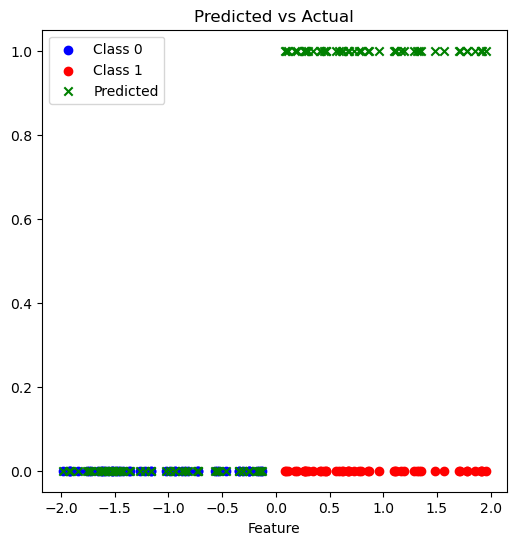

In [58]:
# Plot the decision boundary and predicted classes
plt.figure(figsize=(6, 6))
plt.scatter(X[y==0], np.zeros_like(X[y==0]), color='blue', label='Class 0')
plt.scatter(X[y==1], np.zeros_like(X[y==1]), color='red', label='Class 1')
plt.scatter(X, y_pred >= 0.5, color='green', marker='x', label='Predicted')
plt.title('Predicted vs Actual')
plt.xlabel('Feature')
plt.legend()
plt.show()

We also want to know the impact and interplay of different values for the learning rate and number of iterations.

* What learning rates and numbers of iterations worked well?

* Try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu).

## Analysis of Learning Rate, Iterations, Hidden Layer Size, and Activation Functions

### 1. Impact of Learning Rate & Iterations
- The loss decreases steadily over iterations for both activation functions.
- With a learning rate of `0.1` and `num_iter = 2000`, the network converges well.
- **Sigmoid** starts higher (~0.6926) and reduces gradually.
- **ReLU** starts slightly lower (~0.6885) and drops faster, showing faster initial learning.
- Iterations beyond 1500–2000 show diminishing improvement.

**Conclusion:** A learning rate of 0.1 and around 1500–2000 iterations work well for this dataset. Smaller rates require more iterations; larger rates may overshoot.

---

### 2. Effect of Hidden Layer Size
- **Sigmoid:** Increasing hidden nodes from 2 → 6 lowers the final loss (0.2596 → 0.1535), indicating more representational power helps.
- **ReLU:** Even 2 nodes achieve very low final loss (~0.0651); increasing nodes slightly improves performance.

**Conclusion:** Hidden layer size matters more for sigmoid. ReLU performs well even with fewer nodes.

---

### 3. Effect of Activation Function
- **Sigmoid:** Slower initial loss reduction; more sensitive to hidden layer size.
- **ReLU:** Faster initial loss reduction, lower final loss, less sensitivity to hidden layer size.

**Conclusion:** For this simple 1D classification task, ReLU outperforms sigmoid in speed and final loss.